<a href="https://colab.research.google.com/github/mansi9339/IBM-Skillbuild/blob/main/Credit_Card_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving credit_record.csv to credit_record.csv
Saving application_record.csv to application_record.csv


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ap_df = pd.read_csv('application_record.csv')
cr_df = pd.read_csv('credit_record.csv')

In [ ]:
result = pd.merge(cr_df, ap_df, on="ID")

In [ ]:
profile = ProfileReport(result, title='Credit card')

In [ ]:
profile.to_file(output_file="Credit Card Approval EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Cleaning the dataset


In [ ]:
df4 = result.dropna().drop_duplicates(subset='ID', keep='first')

## Prediction Modelling

(19.951999999999998, 24.7]     630
(24.7, 29.4]                  3375
(29.4, 34.1]                  4267
(34.1, 38.8]                  3539
(38.8, 43.5]                  4350
(43.5, 48.2]                  3566
(48.2, 52.9]                  2490
(52.9, 57.6]                  1924
(57.6, 62.3]                   819
(62.3, 67.0]                   174
Name: Age, dtype: int64


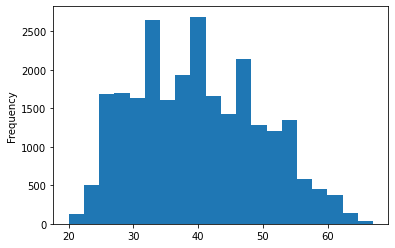

In [ ]:
# Converting the Days of Birth field to Age in years.
df4['Age']=-(df4['DAYS_BIRTH'])//365	
print(df4['Age'].value_counts(bins=10,normalize=False,sort=False))
df4['Age'].plot(kind='hist',bins=20,density=False)

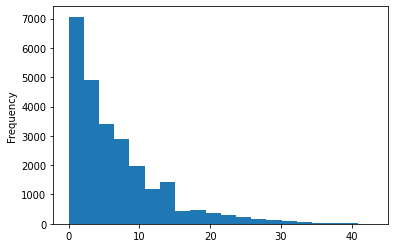

In [ ]:
# Converting the Days_Employed field from days to Years and the visualising.
df4['Employed']=-(df4['DAYS_EMPLOYED'])//365	
df4[df4['Employed']<0] = np.nan # replace by na
df4['DAYS_EMPLOYED']
df4['Employed'].fillna(df4['Employed'].mean(),inplace=False) #replace na by mean
df4['Employed'].plot(kind='hist',bins=20,density=False)

In [ ]:
df4['OCCUPATION_TYPE'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
PNoLoan = (df4.loc[df4['STATUS'] == 'X'].shape[0]/df4.shape[0]) * 100
print(str(round(PNoLoan, 2)) + "% of people have no loans.")

26.65% of people have no loans.


In [ ]:
PPaidOf = (df4.loc[df4['STATUS'] == 'C'].shape[0]/df4.shape[0]) * 100
print(str(round(PPaidOf, 2)) + "% of customers have paid off there dues.")

49.01% of customers have paid off there dues.


In [ ]:
defaulters= ['0','1','2','3','4','5']

In [ ]:
df4['OverDues'] = np.where(df4.STATUS.isin(defaulters), 1, 0)
df4.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age,Employed,OverDues
31,5008806.0,0.0,C,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,58.0,3.0,0
61,5008808.0,0.0,0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,52.0,8.0,1
66,5008809.0,-22.0,X,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,52.0,8.0,0
71,5008810.0,0.0,C,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,52.0,8.0,0
98,5008811.0,0.0,C,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,52.0,8.0,0


In [ ]:
df4.groupby('OCCUPATION_TYPE')

### Income types VS Customer Frequency

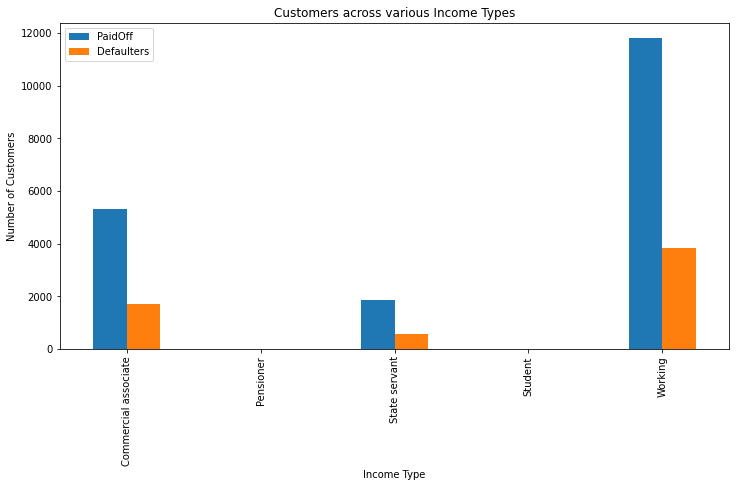

In [ ]:
pd.crosstab(df4.NAME_INCOME_TYPE, df4.OverDues).plot(kind='bar', figsize=(12,6))
plt.title('Customers across various Income Types')
plt.xlabel('Income Type')
plt.ylabel('Number of Customers')
plt.legend(labels = ["PaidOff", "Defaulters"])

In [ ]:
# Put in the columns that we want to make the dummie variable of...
df7 = pd.get_dummies(result, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'], drop_first = False)
df7['OverDues'] = np.where(df7.STATUS.isin(defaulters), 1, 0)

In [ ]:
df7.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartmen

In [ ]:
#Mentioning our Features
Features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents']

## Test Train split


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

train, test = train_test_split(df7, test_size = 0.3, random_state=21)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[Features]
label_train = train['OverDues']
features_test = test[Features]
label_test = test['OverDues']

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
RFCaccuracy_train = (accuracy_score(pred_train,label_train)) * 100
RFCaccuracy_test = (accuracy_score(pred_test,label_test)) * 100

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('Accuracy Score')
print(accuracy_score(label_test, pred_test),'\n')

print('Precision Score')
print(precision_score(label_test, pred_test,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix(label_test, pred_test)
columns = ['Non Defaulter','Defaulter'] 
print(pd.DataFrame(array,columns = columns, index = columns),'\n')

print('Classification Report')
print(classification_report(label_test, pred_test),'\n')

Accuracy Score
0.7147675888819836 

Precision Score
[0.72609109 0.68553005] 

Confusion Matrix
               Non Defaulter  Defaulter
Non Defaulter         122114      20483
Defaulter              46066      44652 

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.86      0.79    142597
           1       0.69      0.49      0.57     90718

    accuracy                           0.71    233315
   macro avg       0.71      0.67      0.68    233315
weighted avg       0.71      0.71      0.70    233315
 

